In [ ]:
import pandas as pd
data = pd.read_csv('/content/diabetes (2).csv')
data.head()
data.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
dataset = data.values
x = dataset[:,0:8]
y = dataset[:,8]
print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
from keras.utils import np_utils
encoded_y = np_utils.to_categorical(y)
encoded_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training,Y_testing = train_test_split(X_scale, encoded_y, test_size = 0.2, random_state = 10)
X_training, X_valid, Y_training,Y_valid = train_test_split(X_training, Y_training, test_size = 0.2, random_state = 10)
print(len(X_training))
print(len(X_testing))
print(len(X_valid))

491
154
123


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()
model.add(Dense(24, input_shape = (8,), activation = 'relu'))
model.add(Dense(20,  activation = 'relu'))
model.add(Dense(12,  activation = 'relu'))
model.add(Dense(8,  activation = 'relu'))
model.add(Dense(2,  activation = 'relu'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                216       
                                                                 
 dense_1 (Dense)             (None, 20)                500       
                                                                 
 dense_2 (Dense)             (None, 12)                252       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,090
Trainable params: 1,090
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers
opt = optimizers.SGD(learning_rate = 0.01)
model.compile(loss='Categorical_Crossentropy' , optimizer = opt, metrics= ['accuracy'])


In [ ]:
#model training
hist= model.fit(X_training, Y_training, batch_size=4, epochs=750, validation_data=(X_valid, Y_valid))

Epoch 1/750


ValueError: ignored

<Figure size 432x288 with 0 Axes>

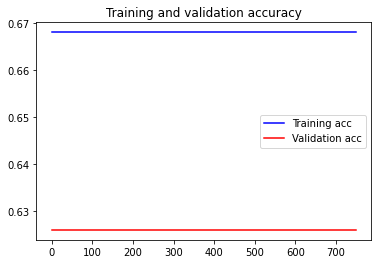

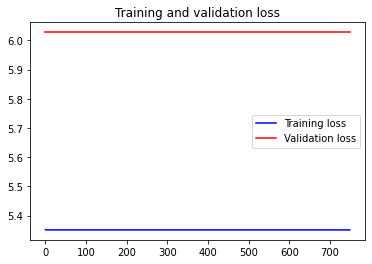

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('custom_trainvalacc.png')
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
#plt.show()
plt.savefig('custom_trainvalloss.png')
plt.figure()


In [ ]:
res = model.evaluate(X_testing, Y_testing)
test = X_testing[0]
y_act = Y_testing[0]
result= model.predict(test.reshape(1,8))
result

5/5 [==============================] - 0s 4ms/step - loss: 6.1751 - accuracy: 0.6169


array([[0.11814945, 0.        ]], dtype=float32)